# Spatial Networks

## Pre-Defined graphs

In order to showcase some uses of the code, I have defined some sub classes that inherit from the `SpatialGraph` class. We are going to review them:

### Random Spatial Graph

This class is inspired from the usual Random Graph object which is used in Graph Theory usually: we generate some nodes. Edges are created between nodes based on a random variable. Here we simply provide nodes with a random position:


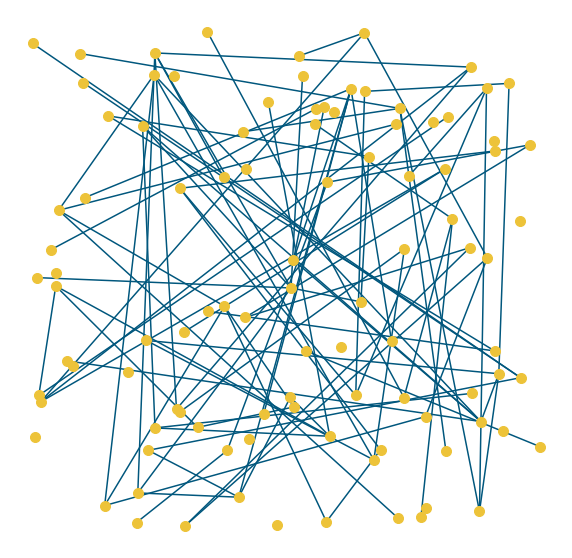

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from spatial_networks import RandomSpatialGraph

my_random_spatial_graph = RandomSpatialGraph(number_of_nodes=100, edge_probability=.02)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

my_random_spatial_graph.draw(ax=ax)



plt.show()

You can choose the position distribution function by picking another `numpy.random` distribution:

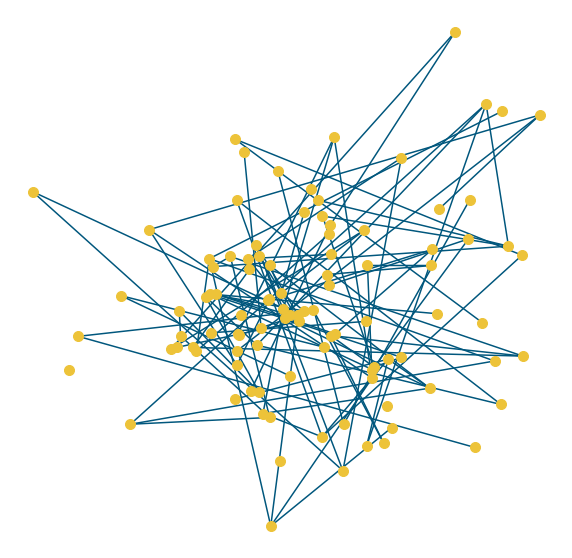

In [2]:
import numpy as np

my_random_spatial_graph2 = RandomSpatialGraph(
    number_of_nodes=100,
    edge_probability=.02,
    position_distribution=np.random.normal
)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

my_random_spatial_graph2.draw(ax=ax)



plt.show()

This class is not very interesting except for tests. 

## Random Geometric Graphs

`RandomSpatialGraph` is a name I gave this class but which should be mixed with `RandomGeometricGraphs`. Random Geometric Graphs (or RGG) are usually are more common in spatial networks. They are defined by picking nodes at random positions. Then, we define a radius $r$ and if the distance between two nodes is less than $2 \times r$, we create an edge between nodes (you can think that the nodes have a bubble around them and if this bubble intersects another bubble, then the nodes are linked).


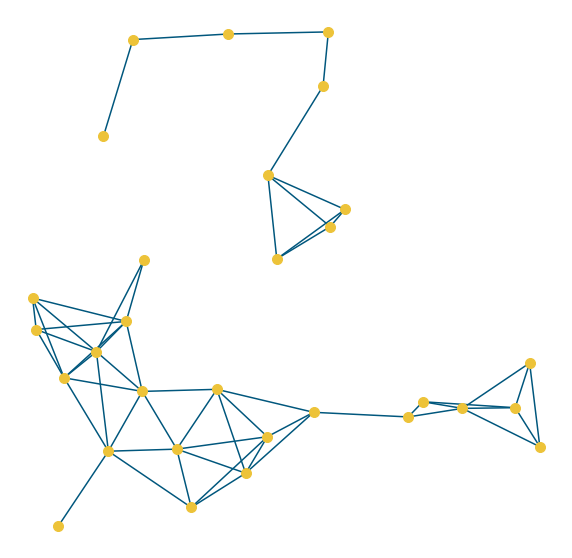

In [3]:
from spatial_networks import RandomGeometricGraph


my_random_geographic_graph = RandomGeometricGraph(number_of_nodes=30, radius=.1)


fig, ax = plt.subplots(1, 1, figsize=(10, 10))

my_random_geographic_graph.draw(ax=ax)



plt.show()

### Soft Random Geometric Graphs

`SoftRGG` are a wider class of Random Graph. The probability of linking two nodes is defined as a function of length called the deterrence function: 

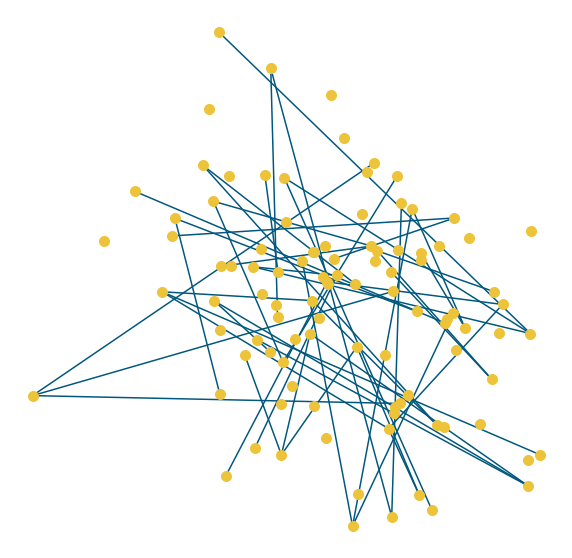

In [4]:
from spatial_networks import SoftRGG

def my_deterrence_function(distance):
    return np.random.uniform() < distance / 200

my_soft_rgg = SoftRGG(
    number_of_nodes=100,
    deterrence_function=my_deterrence_function,
    position_distribution=np.random.normal
)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

my_soft_rgg.draw(ax=ax)




plt.show()

## Star Network

The two following classes are toy examples for studying spatial graphs. We build regular star networks by providing a depth and a number of branches in the star:

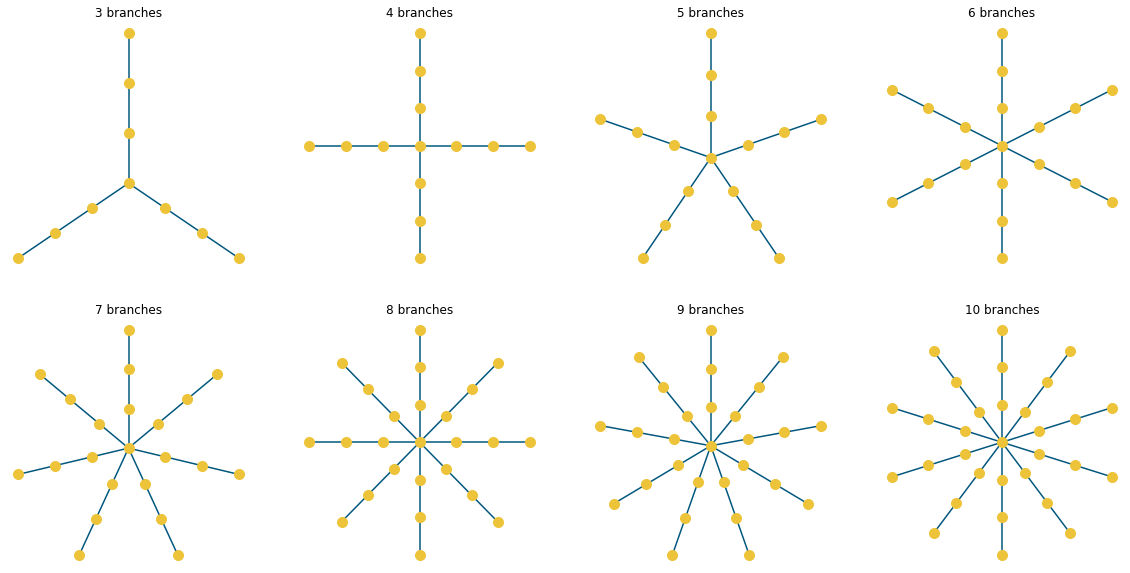

In [5]:
from spatial_networks import StarSpatialGraph

star_networks = []

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for n in range(3, 11):
    i = (n - 3) // 4
    j = (n - 3) % 4
    
    my_star_network = StarSpatialGraph(number_of_branches=n, nodes_per_branch=4)
    
    my_star_network.draw(ax=axes[i, j])
    axes[i, j].set_title(f"{n} branches")
    axes[i, j].axis("off")
    
    star_networks.append(my_star_network)
plt.show()
    
    

### Star and Ring Netowks

The principle of the Star and Ring Network is not add links at a given depth in a star network:

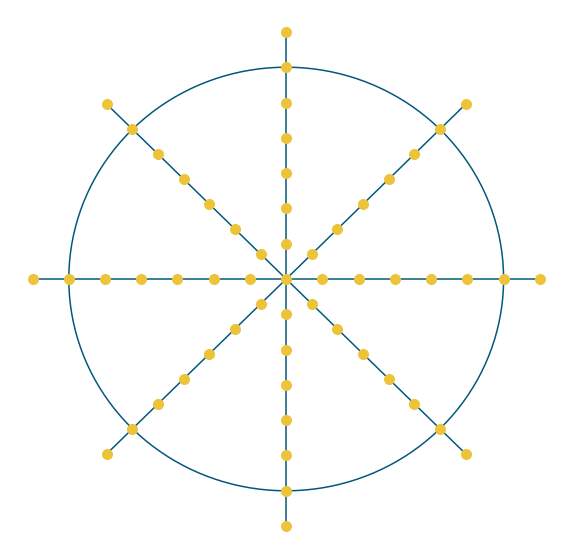

In [6]:
from spatial_networks import StarAndRingNetwork

my_star_network_with_ring = StarAndRingNetwork(number_of_branches=8, nodes_per_branch=8, ring_depths=[6])

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

my_star_network_with_ring.draw(ax=ax)




plt.show()

For some reason, I added the possibility for several rings (probably useless but pretty):

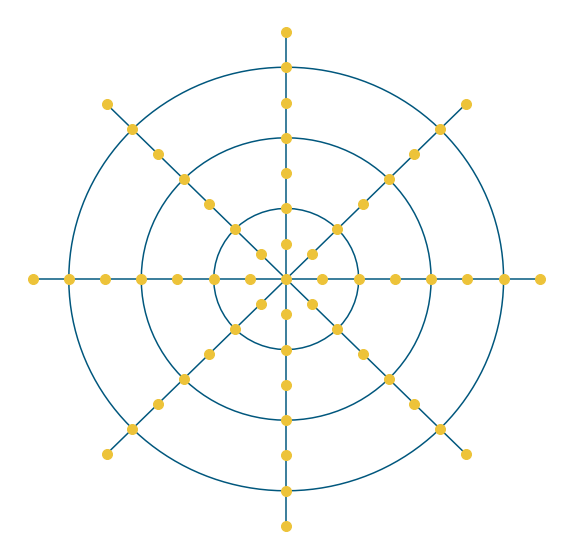

In [7]:
from spatial_networks import StarAndRingNetwork

my_star_network_with_rings = StarAndRingNetwork(number_of_branches=8, nodes_per_branch=8, ring_depths=[2, 4, 6])

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

my_star_network_with_rings.draw(ax=ax)




plt.show()

### Lattices

Lattices are regularly spaced and connected graphs. They can be used for benchmarks:

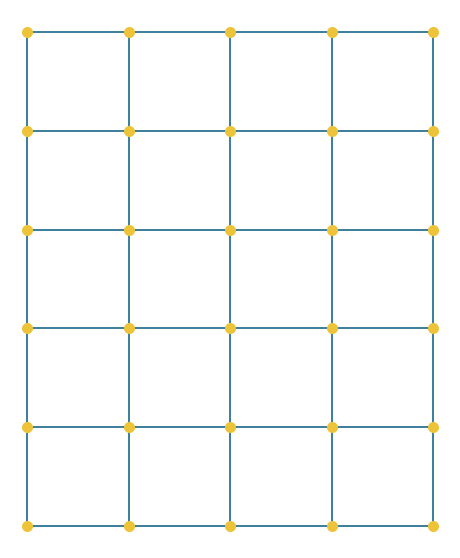

In [8]:
from spatial_networks import SquareLattice


my_square_lattice = SquareLattice(nb_lines=5, squares_per_line=4)

fig, ax = plt.subplots(1, 1, figsize=(8, 10))

my_square_lattice.draw(ax=ax)




plt.show()

### Triangular lattice

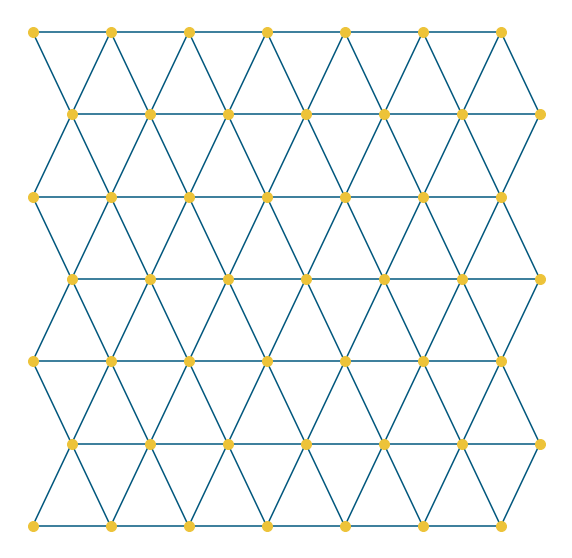

In [9]:
from spatial_networks import TriangleLattice

my_triangle_lattice = TriangleLattice(
    triangles_per_line=6,
    nb_lines=6,
    triangle_base=1,
    triangle_height=1
)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

my_triangle_lattice.draw(ax=ax)




plt.show()

### Hexagonal lattice

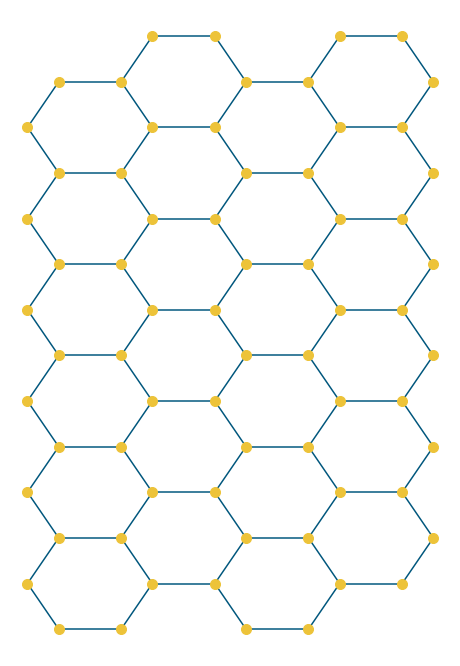

In [10]:
from spatial_networks import HexagonalLattice

my_hexagonal_lattice = HexagonalLattice(
    hexagons_per_line=4,
    nb_lines=6
)

fig, ax = plt.subplots(1, 1, figsize=(8, 12))

my_hexagonal_lattice.draw(ax=ax, include_names=False)




plt.show()

### Regular Trees

Regular Trees can be useful too:

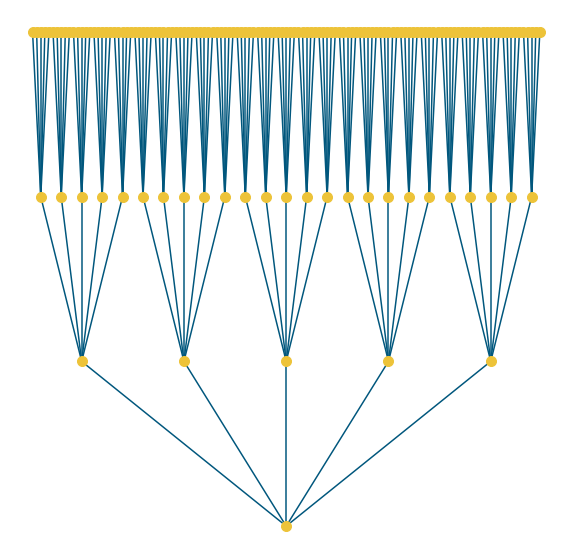

In [11]:
from spatial_networks import RegularTree

my_tree = RegularTree(branching_factor=5, tree_depth=3, leaf_spacing=.1)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

my_tree.draw(ax=ax, include_names=False)

plt.show()

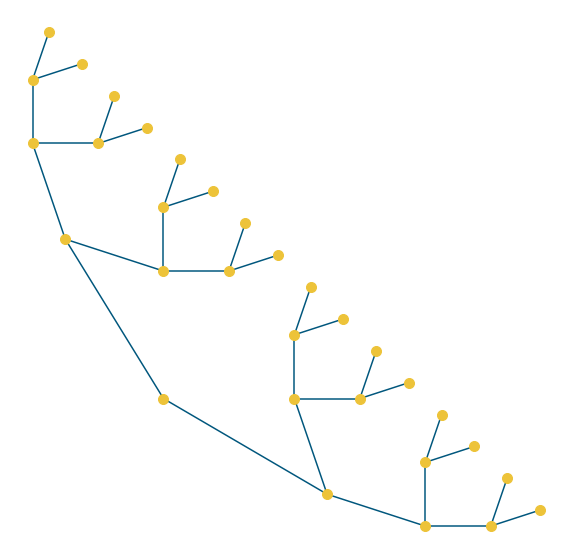

In [12]:
my_binary_tree = RegularTree(branching_factor=2, tree_depth=4, rotation=45)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

my_binary_tree.draw(ax=ax, include_names=False)

plt.show()

### GridTree

A GridTree can be useful to simulate a city and its suburbs.

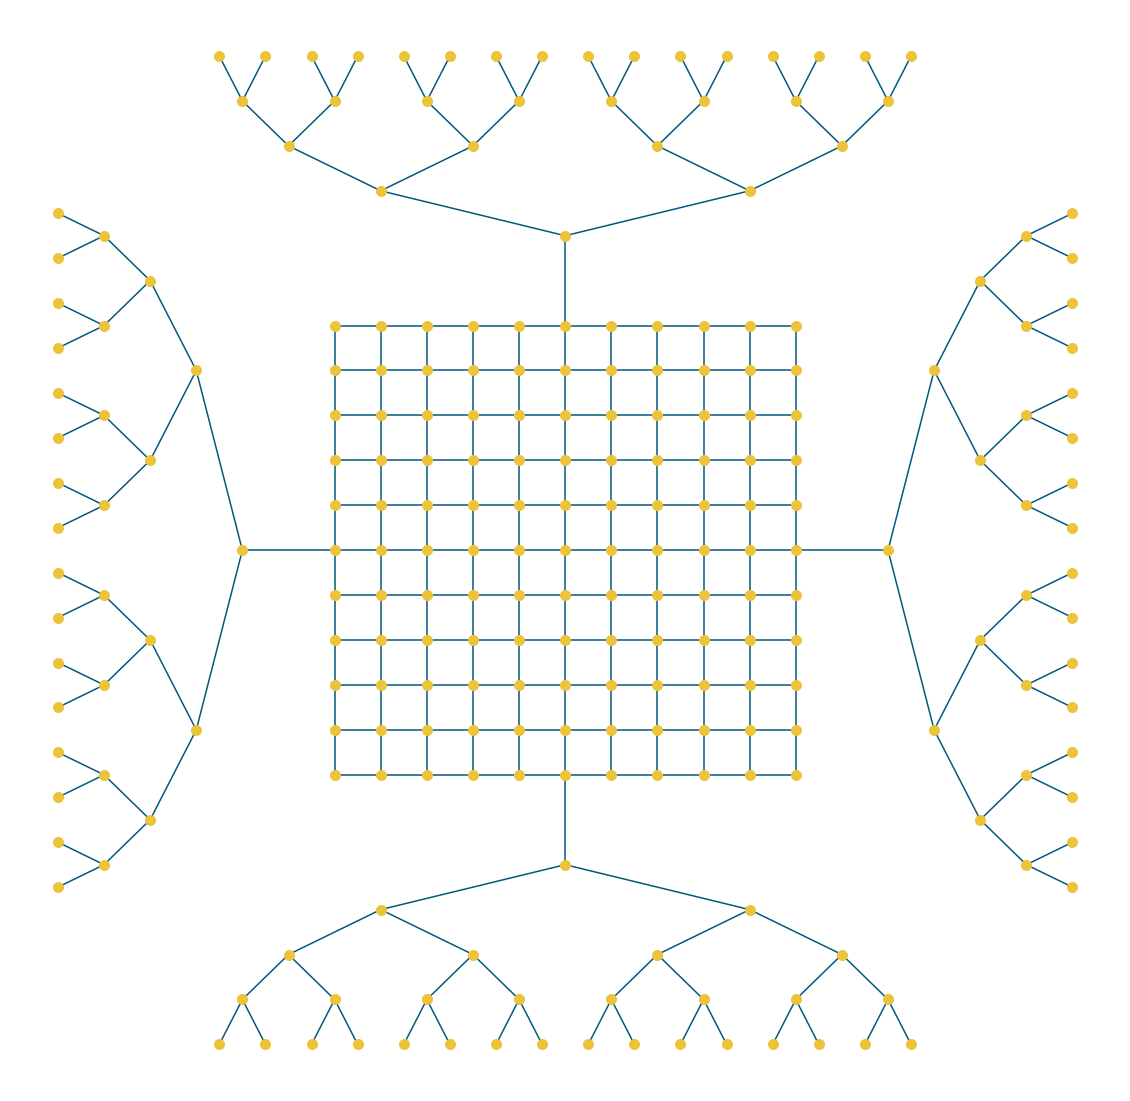

In [13]:
from spatial_networks import GridTree

my_grid_tree = GridTree(suburb_spacing=2, suburb_leaf_spacing=1.)


fig, ax = plt.subplots(1, 1, figsize=(20, 20))

my_grid_tree.draw(ax=ax, include_names=False)




plt.show()

## Shortest path, Metric distance and Detour index

In Spatial Networks, a good caracterization of a graph can be made by using the detour index:

$$\eta(i, j) = \frac{d_R(i, j)}{d_E(i, j)}$$

where

* $d_E(i, j)$ is the Euclidean distance between nodes i and j
* $d_R(i, j)$ is the cumulative distance on the shortest pass between i and j


Let's consider the two following networks:

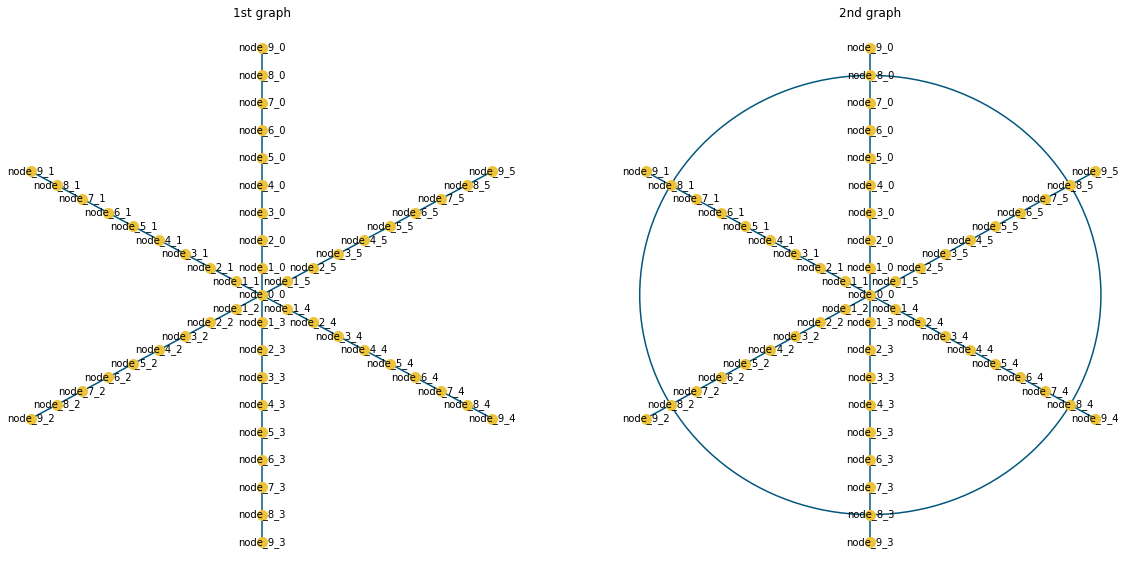

In [14]:
nb_branches = 6
nodes_per_branch = 10

graph1 = StarSpatialGraph(
    number_of_branches=nb_branches,
    nodes_per_branch=nodes_per_branch
)
graph2 = StarAndRingNetwork(
    number_of_branches=nb_branches,
    nodes_per_branch=nodes_per_branch,
    ring_depths=[8]
)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

graph1.draw(include_names=True, ax=axes[0])
graph2.draw(include_names=True, ax=axes[1])

axes[0].set_title("1st graph")
axes[1].set_title("2nd graph")

axes[0].axis("off")
axes[1].axis("off")

plt.show()


In [15]:
node_i = "node_9_0"
node_j = "node_8_1"

metric_distance_1 = graph1.metric_distance(node_i, node_j)
metric_distance_2 = graph2.metric_distance(node_i, node_j)

route_distance_1 = graph1.route_distance(node_i, node_j)
route_distance_2 = graph2.route_distance(node_i, node_j)

print(
f"""Graph 1:
Metric distance between '{node_i}' and '{node_j}': {round(metric_distance_1, 2)}
Route distance between '{node_i}' and '{node_j}': {round(route_distance_1, 2)}
Detour index: {round(route_distance_1 / metric_distance_1, 2)}

Graph 2:
Metric distance between '{node_i}' and '{node_j}': {round(metric_distance_2, 2)}
Route distance between '{node_i}' and '{node_j}': {round(route_distance_2, 2)}
Detour index: {round(route_distance_2 / metric_distance_2, 2)}
"""
)


Graph 1:
Metric distance between 'node_9_0' and 'node_8_1': 8.54
Route distance between 'node_9_0' and 'node_8_1': 17.0
Detour index: 1.99

Graph 2:
Metric distance between 'node_9_0' and 'node_8_1': 8.54
Route distance between 'node_9_0' and 'node_8_1': 9.38
Detour index: 1.1



The accessibility of a node is defined by the average detour index of a node:

$$\eta(i) = \frac{1}{N-1}\sum_{j}\eta(i, j)$$

In [16]:
node_i = "node_9_0"

detour_index_1 = []

for node_j in graph1:
    if node_j != node_i:
        detour_index_1.append(graph1.detour_index(node_i, node_j))

accessibility1 = np.mean(detour_index_1)        

detour_index_2 = []

for node_j in graph2:
    if node_j != node_i:
        detour_index_2.append(graph2.detour_index(node_i, node_j))

accessibility2 = np.mean(detour_index_2)

print(
f"""Graph 1:
Accessibility of node '{node_i}': {round(accessibility1, 2)}

Graph 2:
Accessibility of node '{node_i}': {round(accessibility2, 2)}
"""
)



Graph 1:
Accessibility of node 'node_9_0': 1.28

Graph 2:
Accessibility of node 'node_9_0': 1.16

